In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['savefig.dpi'] = 300

# Load one family (repeat for fam1, fam2, fam3)
fam_id = 0
cpv = pd.read_csv(f'/home/raj.ayush/results/clustering_step1/cpv_fam{fam_id}.csv')
gv = pd.read_csv(f'/home/raj.ayush/results/clustering_step1/gv_fam{fam_id}.csv')

In [3]:
print(f"Family {fam_id} CPV shape:", cpv.shape)
print(f"Family {fam_id} GV shape:", gv.shape)
print("\nCPV columns:", cpv.columns.tolist())
display(cpv.head())
display(cpv.describe())

Family 0 CPV shape: (1930, 15)
Family 0 GV shape: (2682714, 13)

CPV columns: ['n_nodes', 'time_amin', 'time_amax', 't2m_amax', 'HWMId_magnitude', 'latitude_mean', 'longitude_mean', 'ytime_mean', 'g_ids', 'n_unique_g_ids', 'dt', 'timespan', 'doy_cos', 'doy_sin', 'kmeans_clust']


,n_nodes,time_amin,time_amax,t2m_amax,HWMId_magnitude,latitude_mean,longitude_mean,ytime_mean,g_ids,n_unique_g_ids,dt,timespan,doy_cos,doy_sin,kmeans_clust
0,110503,1979-01-01,2018-12-31,50.902008,28082.543372,10.230204,91.567009,185.673611,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",44797,14609 days,14610,-0.998508,-0.054604,0
1,469656,2015-08-19,2016-02-09,47.464752,74419.856283,0.809357,74.803901,200.829032,"{62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...",42923,174 days,175,-0.950635,-0.310311,0
2,45757,1998-07-27,1998-08-31,37.768950,3512.039896,-7.385258,114.960678,224.868960,"{65552, 65553, 65554, 65555, 65556, 65557, 655...",9654,35 days,36,-0.745609,-0.666384,0
3,33545,2012-07-22,2012-08-15,34.913240,22.577999,3.040908,56.113176,215.511999,"{32803, 32804, 32805, 32806, 32807, 32808, 328...",7673,24 days,25,-0.842830,-0.538179,0
4,31156,2012-08-17,2012-09-09,40.373688,1918.526698,-0.719035,67.891714,242.596964,"{39080, 39081, 39082, 39083, 32798, 32799, 328...",9740,23 days,24,-0.510937,-0.859618,0


,n_nodes,t2m_amax,HWMId_magnitude,latitude_mean,longitude_mean,ytime_mean,n_unique_g_ids,timespan,doy_cos,doy_sin,kmeans_clust
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.0
mean,1390.007254,36.738260,595.089565,15.328895,83.895572,223.944224,613.944560,13.239378,-0.688686,-0.593860,0.0
std,11281.251349,7.092538,2702.533154,16.216131,29.336503,25.103830,1684.082285,332.472642,0.282036,0.305922,0.0
min,101.000000,19.341950,0.000000,-14.462707,35.562112,180.837838,101.000000,3.000000,-1.000000,-0.998918,0.0
25%,213.000000,30.029450,0.000000,2.132811,56.709766,203.275650,156.000000,3.000000,-0.936727,-0.879278,0.0
50%,384.500000,36.479889,63.334840,16.118699,86.031348,221.547814,266.000000,4.000000,-0.782468,-0.622691,0.0
75%,834.250000,41.733246,335.711070,28.415179,108.243365,244.910347,542.250000,7.000000,-0.476309,-0.350061,0.0
max,469656.000000,53.272125,74419.856283,44.713415,134.381818,271.047170,44797.000000,14610.000000,-0.046510,0.028609,0.0


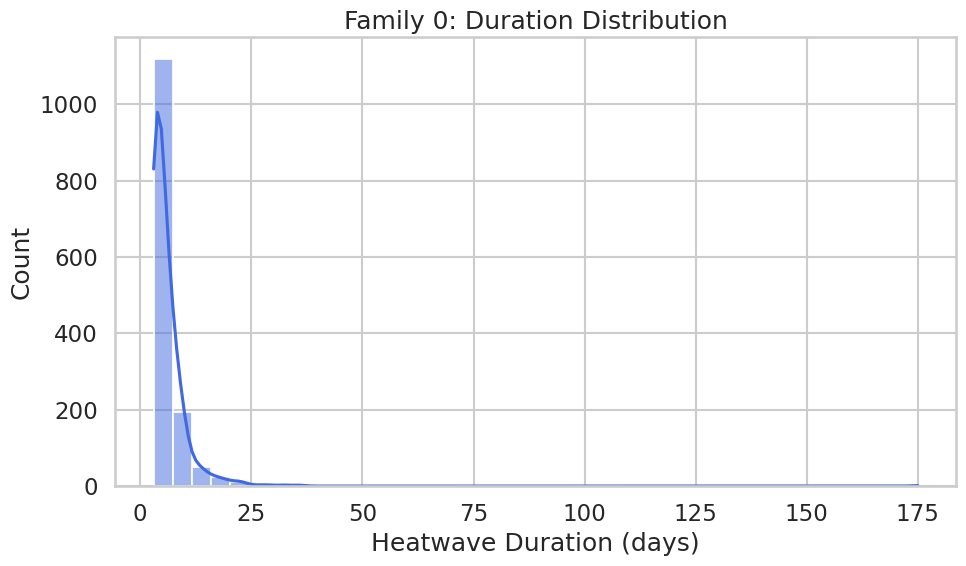

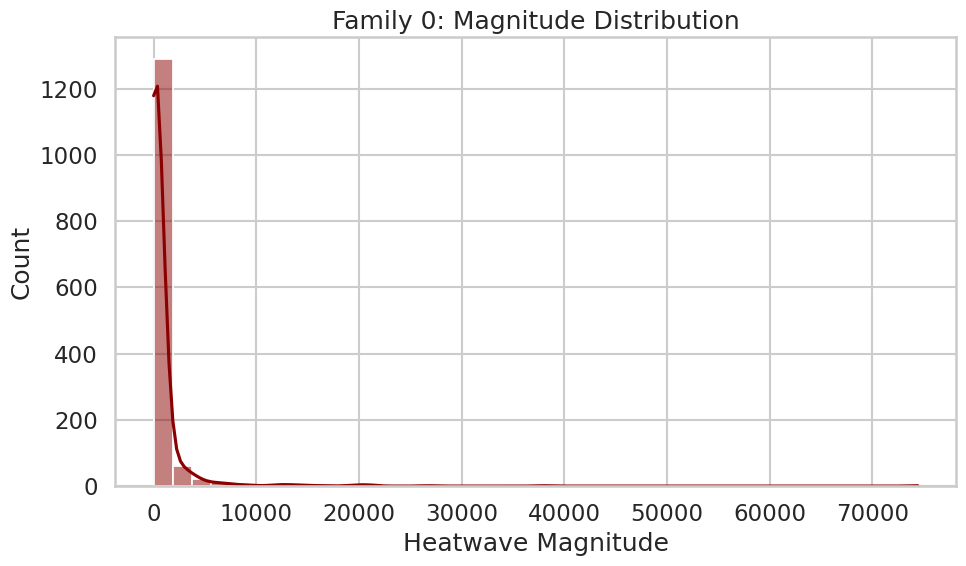

In [4]:
cpv_filtered = cpv[(cpv['timespan'] > 0) & (cpv['timespan'] <= 365) & (cpv['HWMId_magnitude'] > 0)]

plt.figure()
sns.histplot(cpv_filtered['timespan'], bins=40, kde=True, color='royalblue')
plt.xlabel('Heatwave Duration (days)')
plt.ylabel('Count')
plt.title(f'Family {fam_id}: Duration Distribution')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_duration_hist.png')
plt.show()

plt.figure()
sns.histplot(cpv_filtered['HWMId_magnitude'], bins=40, kde=True, color='darkred')
plt.xlabel('Heatwave Magnitude')
plt.ylabel('Count')
plt.title(f'Family {fam_id}: Magnitude Distribution')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_magnitude_hist.png')
plt.show()

/tmp/ipykernel_2031038/220179665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpv_filtered['time_amin'] = pd.to_datetime(cpv_filtered['time_amin'])
/tmp/ipykernel_2031038/220179665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpv_filtered['month'] = cpv_filtered['time_amin'].dt.month
/tmp/ipykernel_2031038/220179665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

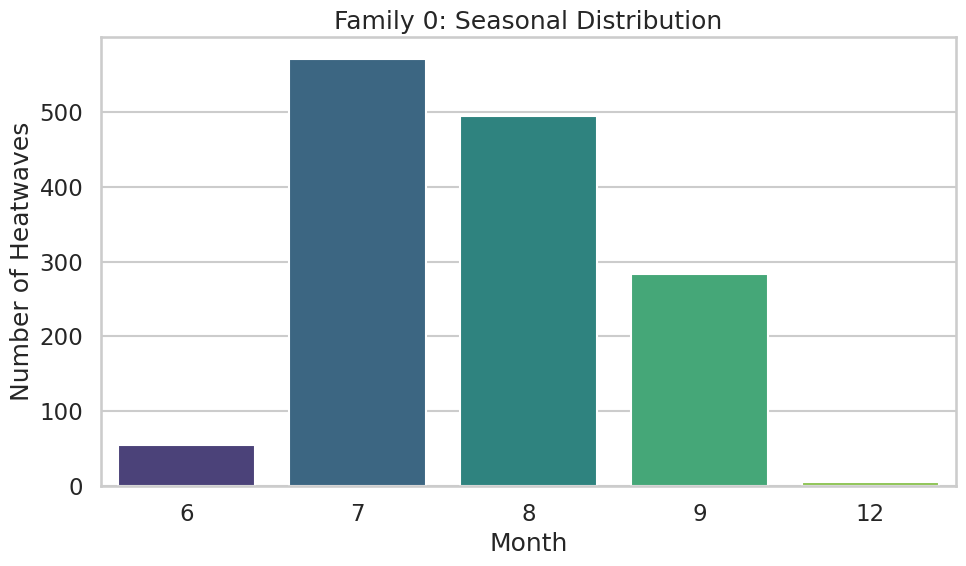

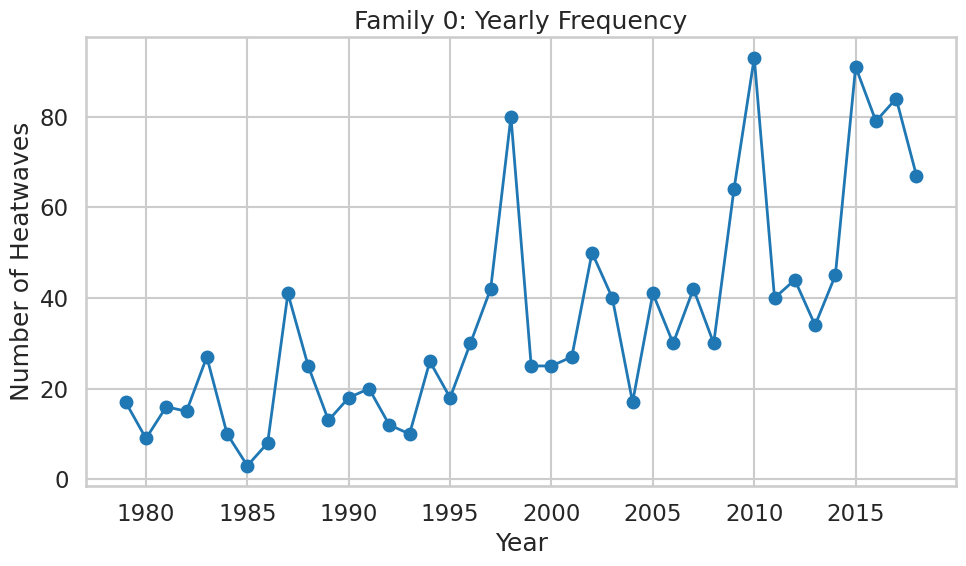

In [5]:
cpv_filtered['time_amin'] = pd.to_datetime(cpv_filtered['time_amin'])
cpv_filtered['month'] = cpv_filtered['time_amin'].dt.month
cpv_filtered['year'] = cpv_filtered['time_amin'].dt.year

plt.figure()
sns.countplot(x='month', data=cpv_filtered, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Heatwaves')
plt.title(f'Family {fam_id}: Seasonal Distribution')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_seasonal_hist.png')
plt.show()

yearly_counts = cpv_filtered['year'].value_counts().sort_index()
plt.figure()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Heatwaves')
plt.title(f'Family {fam_id}: Yearly Frequency')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_yearly_trend.png')
plt.show()

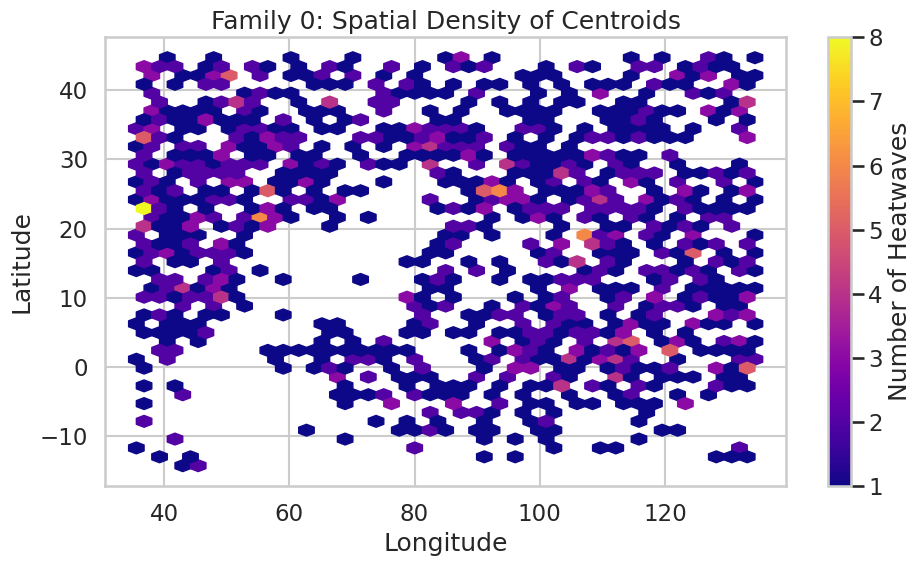

In [6]:
plt.figure()
plt.hexbin(
    cpv_filtered['longitude_mean'],
    cpv_filtered['latitude_mean'],
    gridsize=40, cmap='plasma', mincnt=1
)
plt.colorbar(label='Number of Heatwaves')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Family {fam_id}: Spatial Density of Centroids')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_spatial_hexbin.png')
plt.show()

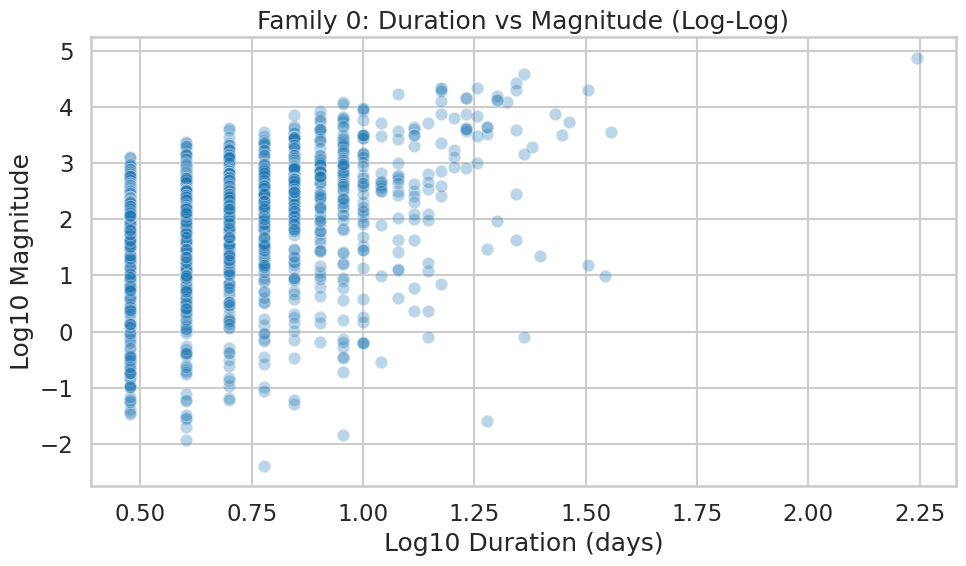

Correlation between duration and magnitude (Family 0): 0.73


In [7]:
plt.figure()
sns.scatterplot(
    x=np.log10(cpv_filtered['timespan']),
    y=np.log10(cpv_filtered['HWMId_magnitude']),
    alpha=0.3
)
plt.xlabel('Log10 Duration (days)')
plt.ylabel('Log10 Magnitude')
plt.title(f'Family {fam_id}: Duration vs Magnitude (Log-Log)')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_duration_magnitude_loglog.png')
plt.show()

corr = cpv_filtered['timespan'].corr(cpv_filtered['HWMId_magnitude'])
print(f"Correlation between duration and magnitude (Family {fam_id}): {corr:.2f}")

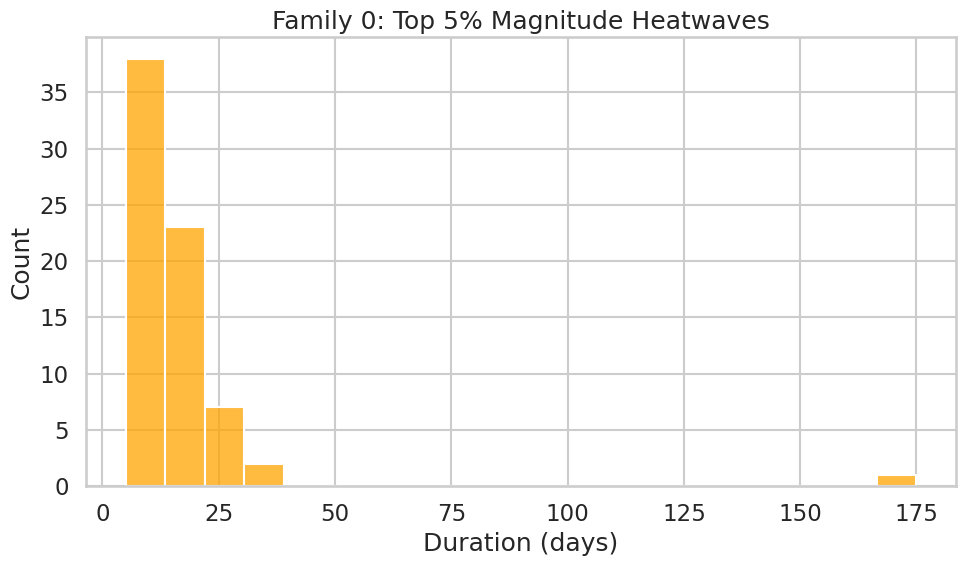

,time_amin,timespan,HWMId_magnitude,latitude_mean,longitude_mean
1,2015-08-19,175,74419.856283,0.809357,74.803901
2,1998-07-27,36,3512.039896,-7.385258,114.960678
5,2016-06-18,29,5441.339304,-5.944345,117.223066
7,2017-07-18,23,37991.573337,22.631881,124.723170
8,1998-08-05,32,20084.511735,16.597211,122.711266
...,...,...,...,...,...
170,2007-07-18,17,4006.826712,25.762468,124.210125
178,2002-07-18,9,3184.989923,22.531024,47.262410
186,2017-08-21,13,3141.825355,28.578675,130.764561
193,1991-07-19,10,3132.024135,28.322030,133.428692


In [8]:
top_mag = cpv_filtered['HWMId_magnitude'].quantile(0.95)
extreme_events = cpv_filtered[cpv_filtered['HWMId_magnitude'] >= top_mag]

plt.figure()
sns.histplot(extreme_events['timespan'], bins=20, color='orange')
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.title(f'Family {fam_id}: Top 5% Magnitude Heatwaves')
plt.tight_layout()
# plt.savefig(f'results/analysis_final/fam{fam_id}_extreme_duration.png')
plt.show()

display(extreme_events[['time_amin', 'timespan', 'HWMId_magnitude', 'latitude_mean', 'longitude_mean']])